# Data Presentation and Visualizations
## National Database of Childcare Prices dataset analysis
This analysis explores the National Database of Childcare Prices (NDCP) to examine the rising cost of childcare across the United States and its broader economic implications. The project involves data cleaning, exploratory data analysis, and visualizations to uncover trends in childcare costs, affordability burdens, and regional disparities. Key variables include median childcare prices by age group, household income levels, and female labor force participation rates. The analysis supports a broader narrative on how childcare affordability impacts families—particularly low- and middle-income households—and informs policy recommendations aimed at improving access and economic equity.

In [1]:
# Import libraries for data manipulation and visualization  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Suppress warnings to keep the output clean  
import warnings
warnings.simplefilter("ignore")

In [3]:
# Load datasets from Excel files
NDCP2022 = pd.read_excel("NDCP2022.xlsx", engine="openpyxl")

In [4]:
# Display dataset structure and data types  
print("Dataset Overview:\n")  
print(NDCP2022.info())  

Dataset Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48308 entries, 0 to 48307
Columns: 370 entries, STATE_NAME to iFEMP_P_STATE
dtypes: float64(200), int64(167), object(3)
memory usage: 136.4+ MB
None


In [5]:
# Display all column names in the dataset
# print(NDCP2022.columns.tolist())

In [6]:
# Display the first few rows to understand the structure
print("\nSample Data:\n")
print(NDCP2022.head())


Sample Data:

  STATE_NAME STATE_ABBREVIATION     COUNTY_NAME  COUNTY_FIPS_CODE  STUDYYEAR  \
0    Alabama                 AL  Autauga County              1001       2008   
1    Alabama                 AL  Autauga County              1001       2009   
2    Alabama                 AL  Autauga County              1001       2010   
3    Alabama                 AL  Autauga County              1001       2011   
4    Alabama                 AL  Autauga County              1001       2012   

   EMR_16  FEMR_16  MEMR_16  EMR_20to64  FEMR_20to64  ...  \
0    61.5     56.1     67.3        71.4         66.3  ...   
1    60.6     54.8     67.0        72.5         66.9  ...   
2    60.4     54.9     66.4        72.3         67.4  ...   
3    58.7     52.4     65.6        71.0         64.9  ...   
4    57.7     52.2     63.8        70.7         65.1  ...   

   iFEMP_SERVICE_STATE  iEMP_SALES_STATE  iMEMP_SALES_STATE  \
0                    1                 1                  1   
1          

In [7]:
# Generate summary statistics for numerical and categorical columns  
print("\nSummary Statistics:\n")  
print(NDCP2022.describe(include='all'))  


Summary Statistics:

       STATE_NAME STATE_ABBREVIATION        COUNTY_NAME  COUNTY_FIPS_CODE  \
count       48308              48308              48308      48308.000000   
unique         52                 52               1957               NaN   
top         Texas                 TX  Washington County               NaN   
freq         3810               3810                450               NaN   
mean          NaN                NaN                NaN      31394.875362   
std           NaN                NaN                NaN      16291.031838   
min           NaN                NaN                NaN       1001.000000   
25%           NaN                NaN                NaN      19032.500000   
50%           NaN                NaN                NaN      30025.000000   
75%           NaN                NaN                NaN      46107.000000   
max           NaN                NaN                NaN      72153.000000   

           STUDYYEAR        EMR_16       FEMR_16     

**Inference**

The dataset spans 2008 to 2022, covering 52 states and 1,957 counties, with Washington County appearing most frequently. It includes key variables related to childcare costs, employment rates, and affordability indicators. Initial observations show that the average employment rate for individuals 16 and older is 54.86%, while for those aged 20-64, it is 68.65%. 

To ensure meaningful insights, the analysis will focus on identifying trends over time, regional variations in childcare costs, and correlations between employment rates and affordability.

### Data Selection for Analysis

After exploring the dataset, we identified key variables aligned with our focus on childcare costs and affordability. Based on the technical report and project objectives, we selected the following categories for analysis, including numerical variables for cost and income, categorical indicators for employment and affordability, and geographic identifiers for regional comparisons.

### Exploratory Data Analysis:  

Visualizations are used to explore impact of childcare costs and affordability. The plots show cost variations by age group and care type. They also compare affordability to income, highlight regional differences, and examine links to employment. Trends over time are tracked to identify changes.

#### 1. Average Childcare Cost by Age Group & Care Type

This plot compares the average childcare costs for different age groups (0-5, 6-11, and 12-17) across two types of care: center-based care and family childcare. The goal is to visualize cost differences and identify how childcare expenses vary by age group and care type.

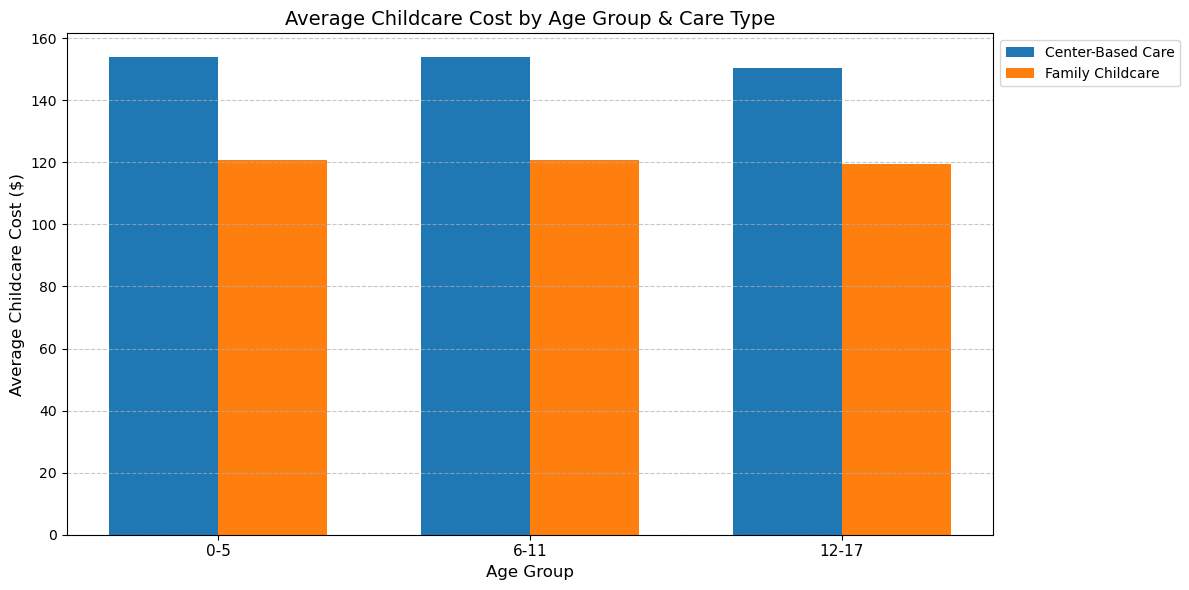

In [8]:
# Define column groups for different childcare types
# MCBto5, MC6to11, MC12to17 -> Center-based care for different age groups
# MFCCBto5, MFCC6to11, MFCC12to17 -> Family childcare for different age groups
center_based_cols = ['MCBto5', 'MC6to11', 'MC12to17']
family_childcare_cols = ['MFCCBto5', 'MFCC6to11', 'MFCC12to17']

# Compute the average childcare costs for each category, ignoring NaN values
center_based_avg = NDCP2022[center_based_cols].mean()
family_childcare_avg = NDCP2022[family_childcare_cols].mean()

# Define labels for the x-axis corresponding to the three age groups
x_labels = ['0-5', '6-11', '12-17']

# Set up the figure size to ensure clear visualization
plt.figure(figsize=(12, 6))

# Set bar width to avoid overlap
bar_width = 0.35
x = range(len(x_labels))  # Define x-axis positions for bars

# Define colorblind-friendly colors (blue & orange)
colors = ['#1f77b4', '#ff7f0e']

# Create bar plots for each childcare type
plt.bar(x, center_based_avg, width=bar_width, label='Center-Based Care', color=colors[0])
plt.bar([i + bar_width for i in x], family_childcare_avg, width=bar_width, label='Family Childcare', color=colors[1])

# Label axes and title
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Average Childcare Cost ($)", fontsize=12)
plt.title("Average Childcare Cost by Age Group & Care Type", fontsize=14)

# Set x-axis tick positions and labels
plt.xticks([i + bar_width / 2 for i in x], x_labels, fontsize=11)

# Move legend outside the plot to prevent overlap
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Add gridlines for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Adjust layout to fit all elements properly
plt.tight_layout()

# Display the plot
plt.show()

**Inference:**

A clear and consistent difference in average cost is observed between Center-Based Care and Family Childcare, with Center-Based Care being significantly more expensive across all age groups (0-5, 6-11, and 12-17). The average cost for each care type remains relatively stable across these age ranges. This suggests that the type of care is the primary factor influencing cost differences, rather than the child’s specific age within these categories.

#### 2. Median Income vs. Childcare Cost

This scatter plot visualizes the relationship between Median Household Income (MHI) and Median Childcare Cost (MCSA). The goal is to examine whether higher-income areas tend to have higher childcare costs, which can help identify potential affordability challenges for families across different income levels.

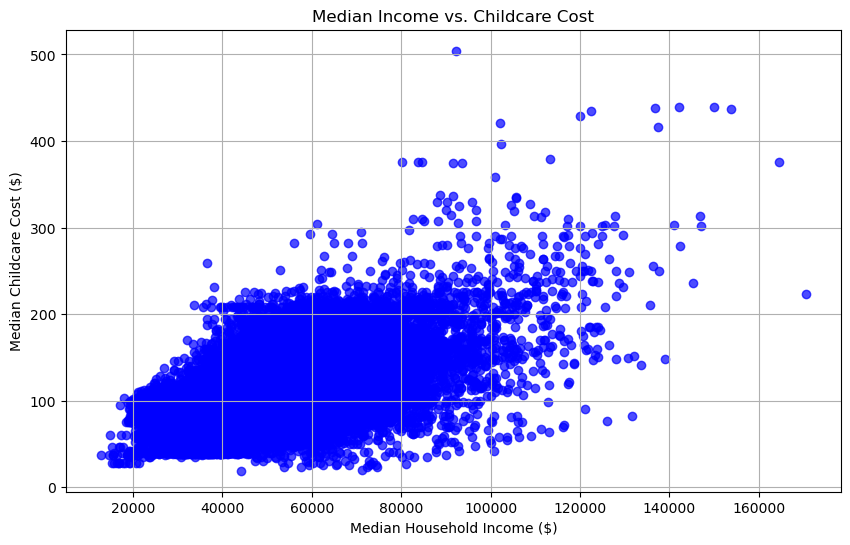

In [9]:
# Create a scatter plot to analyze the relationship between income and childcare costs
plt.figure(figsize=(10, 6))  # Set figure size for better readability

# Scatter plot of Median Household Income vs. Median Childcare Cost
plt.scatter(NDCP2022['MHI'], NDCP2022['MCSA'], alpha=0.7, color='blue')

# Label axes to clearly define the variables being compared
plt.xlabel('Median Household Income ($)')
plt.ylabel('Median Childcare Cost ($)')

# Add title to summarize the key insight of the plot
plt.title('Median Income vs. Childcare Cost')

# Add grid lines for better readability
plt.grid(True)

# Display the plot
plt.show()

**Inference**

The scatter plot shows a positive correlation between median household income and median childcare costs. While lower-income households tend to have lower childcare costs, higher-income households experience a wider range of costs, with some extreme outliers. This suggests that childcare costs increase with income but are not uniformly distributed, possibly due to regional variations or differences in childcare quality and availability.

#### 3. Female Employment Rate vs. Childcare Costs

This scatter plot explores the relationship between female employment rates (ages 16+) and median childcare costs. Understanding this correlation is crucial because high childcare costs can be a barrier to workforce participation, particularly for women. This analysis helps identify whether areas with higher female employment rates also experience higher childcare costs.

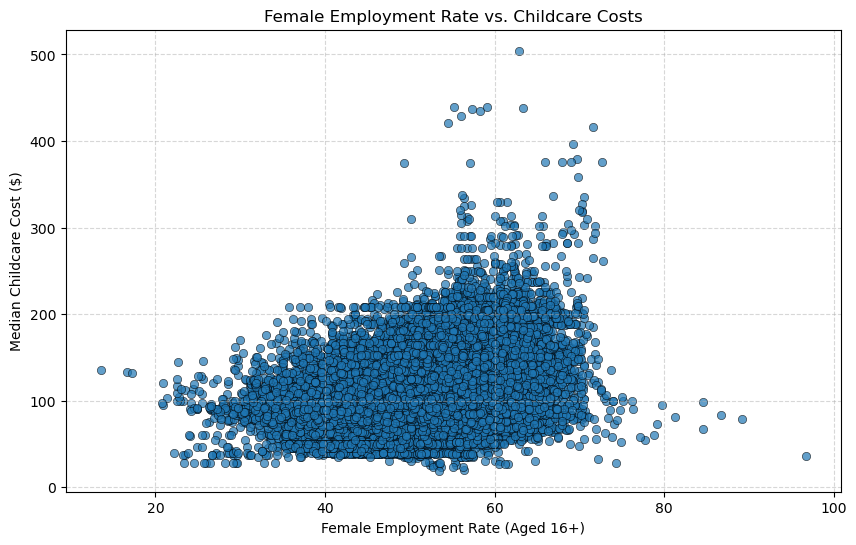

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot to analyze the relationship between female employment rates and childcare costs
plt.figure(figsize=(10, 6))  # Set figure size for clarity

# Use Seaborn for better visualization
sns.scatterplot(data=NDCP2022, x="FEMR_16", y="MCSA", alpha=0.7, edgecolor="black")

# Label axes to clarify variables being compared
plt.xlabel("Female Employment Rate (Aged 16+)")
plt.ylabel("Median Childcare Cost ($)")

# Add a descriptive title
plt.title("Female Employment Rate vs. Childcare Costs")

# Improve readability with grid lines
plt.grid(True, linestyle="--", alpha=0.5)

# Display the plot
plt.show()

**Inference**

The scatter plot suggests a weak positive correlation between female employment rate and median childcare costs. As female employment increases, childcare costs tend to rise, but the relationship is not strongly linear. There is significant variability, indicating that other factors, such as regional differences and childcare availability, may also influence costs. Higher employment rates may drive up demand for childcare services, leading to increased costs in certain areas.

#### 4. Employment Rate Trends (Aged 16+) by Gender

This line plot illustrates the employment rate trends for males and females (aged 16+) over time. By analyzing these trends, we can observe how workforce participation has evolved, particularly in relation to economic shifts, policy changes, and social factors. This helps in understanding gender disparities in employment and whether they are narrowing or widening over time.

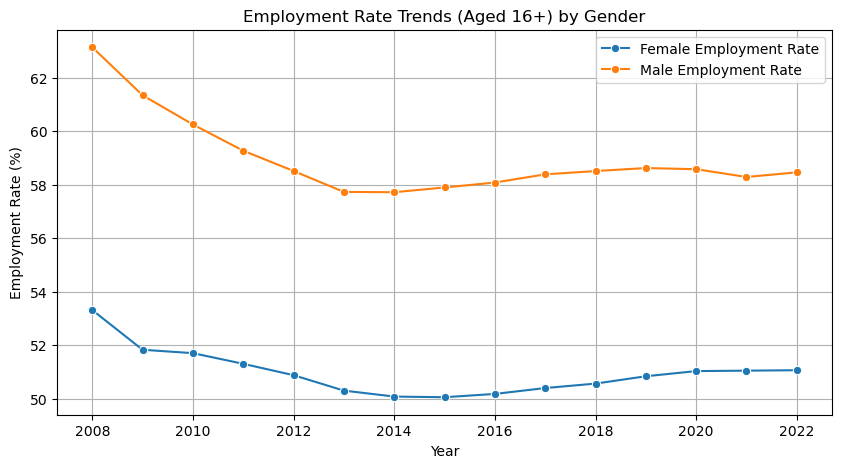

In [11]:
# Group data by year and calculate average employment rates for males and females
yearly_trends = NDCP2022.groupby('STUDYYEAR')[['FEMR_16', 'MEMR_16']].mean()

# Set figure size for better readability
plt.figure(figsize=(10, 5))

# Plot the employment rate trends for females and males
ax = sns.lineplot(x=yearly_trends.index, y=yearly_trends['FEMR_16'], marker="o", label="Female Employment Rate")
sns.lineplot(x=yearly_trends.index, y=yearly_trends['MEMR_16'], marker="o", label="Male Employment Rate", ax=ax)

# Title and labels
plt.title('Employment Rate Trends (Aged 16+) by Gender')
plt.xlabel('Year')
plt.ylabel('Employment Rate (%)')

# Display legend to differentiate between male and female trends
plt.legend()

# Add grid lines for better visibility
plt.grid(True)

# Show the plot
plt.show()

**Inference**

The employment rate for both males and females declined from 2008 to 2014, followed by a period of stabilization and slight recovery. Male employment dropped from around 62% to 58%, while female employment decreased from 54% to 50%. Although both rates showed modest improvements after 2014, male employment rates consistently remained higher than female employment rates throughout the period from 2008 to 2022.

#### 5. Childcare Cost Trends Over Time

This plot visualizes the trend in median childcare costs over time, showing how costs have evolved from year to year. Understanding these trends helps identify periods of rising childcare expenses and potential economic factors influencing affordability for families.

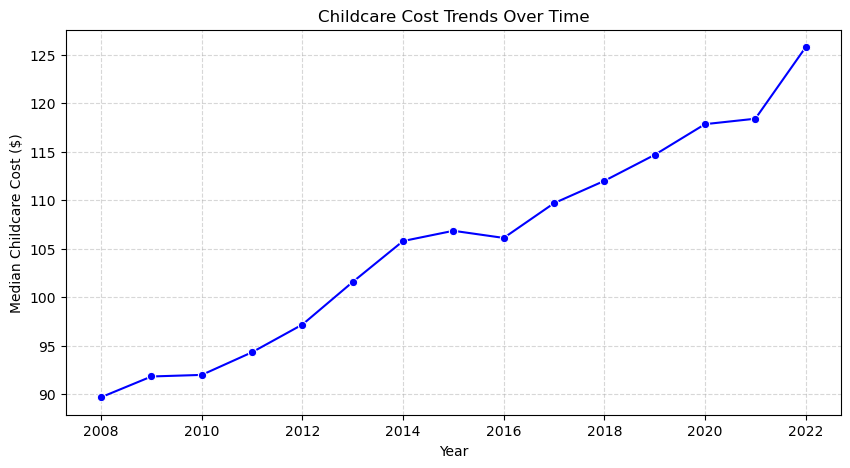

In [12]:
# Group data by year and calculate mean childcare cost
yearly_childcare_trends = NDCP2022.groupby('STUDYYEAR')['MCSA'].mean()

# Set up the figure size
plt.figure(figsize=(10, 5))

# Plot the trend of median childcare costs over the years
sns.lineplot(x=yearly_childcare_trends.index, y=yearly_childcare_trends.values, marker="o", color='b')

# Labels and title
plt.title('Childcare Cost Trends Over Time')   
plt.xlabel('Year')  # X-axis represents the year
plt.ylabel('Median Childcare Cost ($)')  # Y-axis represents the average childcare cost

# Add a grid to improve readability
plt.grid(True, linestyle="--", alpha=0.5)

# Display the plot
plt.show()

**Inference**

The line chart illustrates the trend in median childcare costs from 2008 to 2022. Over this period, childcare costs have steadily increased, starting at approximately 90 dollars in 2008 and surpassing 125 dollars by 2022. Notable periods of rapid growth are observed around 2013–2014 and 2021–2022. This upward trend suggests that childcare expenses have become progressively more burdensome for families over time.

#### 6. Employment Rate Trends Over Time (Aged 16+)

This plot visualizes the trend in overall employment rates (ages 16+) from 2008 to 2022. Understanding employment trends provides insight into economic shifts that may influence household income and, in turn, childcare affordability.

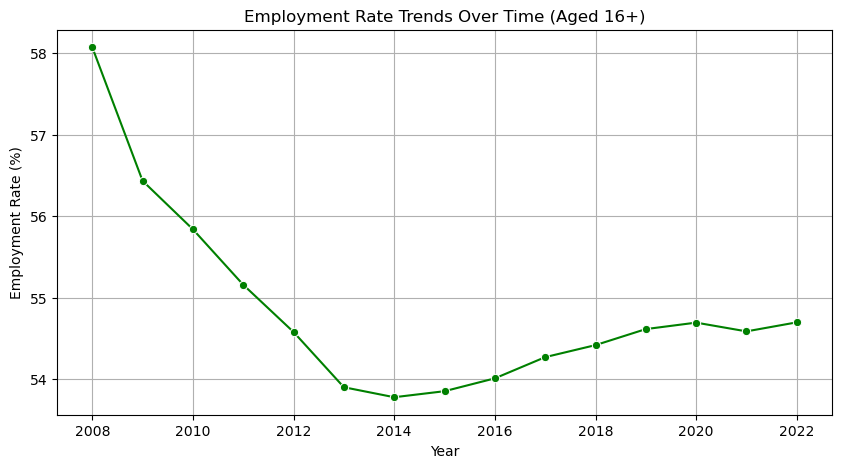

In [13]:
# Group data by year and calculate the average employment rate
yearly_employment_trends = NDCP2022.groupby('STUDYYEAR')['EMR_16'].mean()

# Set up the plot
plt.figure(figsize=(10, 5))   
sns.lineplot(x=yearly_employment_trends.index, y=yearly_employment_trends.values, marker="o", color='g')

# Titles and labels
plt.title('Employment Rate Trends Over Time (Aged 16+)')  # Chart title
plt.xlabel('Year')  # X-axis label
plt.ylabel('Employment Rate (%)')  # Y-axis label

# Add grid for better readability
plt.grid(True)

# Display the plot
plt.show()

**Inference**

The employment rate started at around 58% in 2008 but experienced a sharp decline until 2014, reaching its lowest point at approximately 54%. After 2014, the employment rate showed a gradual recovery, with minor fluctuations, but remained below the 2008 level. The data suggests a significant impact of economic downturns, particularly the Great Recession, followed by a slow but steady recovery.

#### 7. Percentage of Median Income Spent on Childcare by State

This bar chart visualizes the percentage of median household income spent on childcare across different U.S. states. By converting weekly childcare costs into annual costs and comparing them to household income, we can assess the financial burden of childcare relative to income levels. The chart helps highlight regional disparities in affordability.

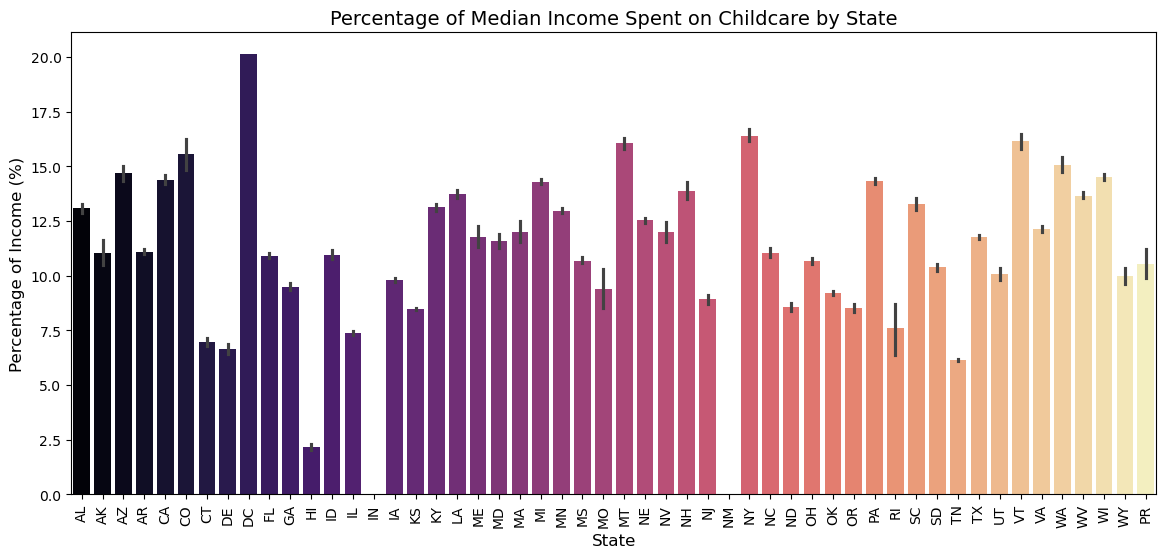

In [14]:
# Convert weekly childcare cost (MCSA) to annual cost
NDCP2022['Annual_Childcare_Cost'] = NDCP2022['MCSA'] * 52  # full-year childcare (52 weeks)

# Calculate percentage of median income spent on childcare
NDCP2022['Childcare_Percentage_Income'] = (NDCP2022['Annual_Childcare_Cost'] / NDCP2022['MHI']) * 100

# Create a bar plot to compare childcare cost burden by state
plt.figure(figsize=(14, 6)) 
sns.barplot(x='STATE_ABBREVIATION', y='Childcare_Percentage_Income', data=NDCP2022, palette='magma')

# Formatting for clarity
plt.xticks(rotation=90)  # Rotate state labels for better readability
plt.title('Percentage of Median Income Spent on Childcare by State', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Percentage of Income (%)', fontsize=12)

# Display the plot
plt.show()

**Inference**

The percentage of median income spent on childcare varies significantly across states, with DC having the highest burden. Several states exceed 15%, while others remain below 10%, indicating disparities in childcare affordability. States with higher percentages may face greater financial strain on families, impacting economic stability and workforce participation.

#### 8: Percentage of Median Income Spent on Childcare

This donut chart highlights the top 5 states where the percentage of median income spent on childcare is the highest. By illustrating the proportion of income dedicated to this essential expense in these leading states, the visualization underscores the significant financial commitment faced by families in these areas.

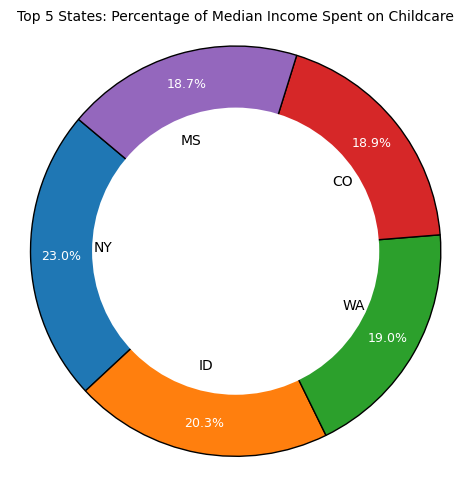

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sort the DataFrame by 'Childcare_Percentage_Income' in descending order
# Get the top unique states
sorted_states = NDCP2022.sort_values(by='Childcare_Percentage_Income', ascending=False)
top_5_distinct_states = sorted_states.drop_duplicates(subset='STATE_ABBREVIATION').head(5)

# Create the donut chart
plt.figure(figsize=(5, 5))
wedges, texts, autotexts = plt.pie(top_5_distinct_states['Childcare_Percentage_Income'],
                                    labels=top_5_distinct_states['STATE_ABBREVIATION'],
                                    autopct='%1.1f%%',
                                    startangle=140,
                                    wedgeprops={'edgecolor': 'black'},
                                    textprops={'fontsize': 10},
                                    radius=1, # Set a radius for easier calculations
                                    pctdistance=0.85)

# Add a white circle in the center to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')
plt.title('Top 5 States: Percentage of Median Income Spent on Childcare', fontsize=10)
plt.tight_layout()

# Move the state labels inside
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left", 0: "center"}[int(np.sign(x))]
    verticalalignment = {-1: "bottom", 1: "top", 0: "center"}[int(np.sign(y))]
    x_coord = x * 0.6 # Adjust radial position
    y_coord = y * 0.6 # Adjust radial position
    texts[i].set_position((x_coord, y_coord))
    texts[i].set_ha(horizontalalignment)
    texts[i].set_va(verticalalignment)
    texts[i].set_fontsize(10)

# Make percentage labels white and slightly smaller
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(9)

plt.show()

**Inference**

Among the top 5 states with the highest percentage of median income spent on childcare, New York (NY) exhibits the greatest burden, allocating approximately 23.0% of its median income. Following closely are Idaho (ID) at 20.3%, Washington (WA) at 19.0%, Colorado (CO) at 18.9%, and Mississippi (MS) at 18.7%.

This visualization underscores a significant financial challenge for families in these leading states, where the cost of childcare consumes a substantial portion of their median income. The range of approximately 18.7% to 23.0% highlights that while New York faces the most significant strain among this top group, the cost of childcare represents a considerable financial factor across all these states, potentially impacting household budgets and economic well-being.